In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Classification


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [11]:
print(mnist.DESCR) # The description of the dataset
print(mnist.data.shape) # The shape of the data
print(mnist.target.shape) # The shape of the target labels

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [28]:
x, y = mnist.data, mnist.target
x
x.shape
y
y.shape


(70000,)

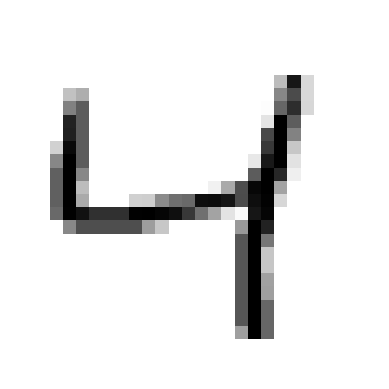

In [27]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image , cmap='binary')
    plt.axis('off')

some_digit = x[2]
plot_digit(some_digit)
plt.show()

In [30]:
# x[2] is looks like 4 
# Let's check the label
y[2]  # Should print '4'

'4'

Split the dataset into training and testing dataset
It is already splited into both dataset as training and testing


In [31]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

#### Training a Binary Classifier


In [35]:
y_train_5 = (y_train == '5')  # True for 5s, False for others
y_test_5 = (y_test == '5')  # True for 5s, False for others

In [38]:
# SGDClassifier

from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)  # Train the classifier


SGDClassifier(random_state=42)

In [44]:
sgd_clf.predict([some_digit])  # Predict for the same digit

array([False])

#### Measuring Accuracy using Cross Validation


In [45]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring='accuracy')  # Cross-validation score


array([0.95035, 0.96035, 0.9604 ])

Don't exicted too much 😒. <br>
Well will verify this through dummy classifier <br>


In [46]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(x_train, y_train_5)
print(any(dummy_clf.predict(x_train)))  # Predict for the same digit

False


In [47]:
cross_val_score(dummy_clf, x_train,y_train_5, cv=3, scoring='accuracy')  # Cross-validation score for dummy classifier

array([0.90965, 0.90965, 0.90965])

Now it is verified 😉 that 10% of images are 5s
